In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
pip install mibian

  Preparing metadata (setup.py) ... done
  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4024 sha256=a1a5dcaee9dfc11b0b7b4970b8fec31c1faf5d035e4e2483af91f370d2652220
  Stored in directory: /root/.cache/pip/wheels/2c/4f/a7/be034e17cc306b0850f5f1a5b4541281b49475c58620a7ff40
Successfully built mibian
Note: you may need to restart the kernel to use updated packages.


In [3]:
import mibian
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

In [4]:
df= pd.read_csv('/kaggle/input/implied-volatility/option_implied_v.csv')

In [3]:
df

,index,Date,Expiry,Option_type,Strike Price,Close,LTP,Settle Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,time_to_maturity_years,riskfree_rates,Div_yield,Historical Volatility,BSOptionPrice2,BSOptionPrice
0,0,2019-04-02,2019-04-04,1,10000.0,1676.35,1648.9,1717.00,375.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1716.839283,1716.839283
1,1,2019-04-02,2019-04-04,1,10050.0,1011.90,0.0,1667.05,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1666.857479,1666.857479
2,2,2019-04-02,2019-04-04,1,10100.0,964.95,0.0,1617.05,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1616.875676,1616.875676
3,3,2019-04-02,2019-04-04,1,10150.0,918.50,0.0,1567.10,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1566.893872,1566.893872
4,4,2019-04-02,2019-04-04,1,10200.0,872.60,0.0,1517.10,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1516.912068,1516.912068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2642148,2689776,2024-03-28,2028-12-28,0,23000.0,575.05,0.0,355.80,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1090.588233,1084.263290
2642149,2689777,2024-03-28,2028-12-28,0,24000.0,742.35,0.0,493.50,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1320.485547,1313.567349
2642150,2689778,2024-03-28,2028-12-28,0,25000.0,937.05,0.0,664.00,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1576.276690,1568.809432
2642151,2689779,2024-03-28,2028-12-28,0,26000.0,1160.95,0.0,869.65,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1857.824399,1849.859604


In [6]:
vix1 =  pd.read_csv("/kaggle/input/vix-data/hist_india_vix_-01-04-2019-to-31-03-2020.csv")
vix2 = pd.read_csv("/kaggle/input/vix-data/hist_india_vix_-01-04-2020-to-31-03-2021.csv")
vix3 = pd.read_csv("/kaggle/input/vix-data/hist_india_vix_-01-04-2021-to-31-03-2022.csv")
vix4 = pd.read_csv("/kaggle/input/vix-data/hist_india_vix_-01-04-2022-to-31-03-2023.csv")
vix5 = pd.read_csv("/kaggle/input/vix-data/hist_india_vix_-01-04-2023-to-31-03-2024.csv")

In [7]:
df_concatenated = pd.concat([vix1,vix2,vix3,vix4,vix5], axis=0)

In [8]:
df_concatenated

,Date,Open,High,Low,Close,Prev. Close,Change,% Change
0,01-APR-2019,17.1850,18.2200,17.1850,18.0050,17.1850,0.82,4.77
1,02-APR-2019,18.0050,18.5525,17.4400,18.0825,18.0050,0.08,0.43
2,03-APR-2019,18.0825,18.8825,17.2900,18.7825,18.0825,0.70,3.87
3,04-APR-2019,18.7825,19.3250,18.2500,18.6500,18.7825,-0.13,-0.71
4,05-APR-2019,18.6500,19.0750,16.7625,18.3925,18.6500,-0.26,-1.38
...,...,...,...,...,...,...,...,...
244,21-MAR-2024,13.4725,13.4725,12.3425,12.5125,13.4725,-0.96,-7.13
245,22-MAR-2024,12.5125,13.0475,11.8100,12.2200,12.5125,-0.29,-2.34
246,26-MAR-2024,12.2200,13.1025,12.0850,12.8200,12.2200,0.60,4.91
247,27-MAR-2024,12.8200,13.0100,12.5325,12.7025,12.8200,-0.12,-0.92


In [9]:
df_concatenated['Date '] = pd.to_datetime(df_concatenated['Date '], format='%d-%b-%Y')
df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df.columns

Index(['index', 'Date', 'Expiry', 'Option_type', 'Strike Price', 'Close',
       'LTP', 'Settle Price', 'Open Int', 'Change in OI', 'Underlying Value',
       'time_to_maturity_days', 'time_to_maturity_years', 'riskfree_rates',
       'Div_yield', 'Historical Volatility', 'BSOptionPrice2',
       'BSOptionPrice'],
      dtype='object')

In [11]:
df = df.merge(df_concatenated[['Date ', 'Close ']], left_on='Date', right_on='Date ', how='left')
df.rename(columns={'Close ': 'Implied_Volatility'}, inplace=True)

In [12]:
df

,index,Date,Expiry,Option_type,Strike Price,Close,LTP,Settle Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,time_to_maturity_years,riskfree_rates,Div_yield,Historical Volatility,BSOptionPrice2,BSOptionPrice,Date,Implied_Volatility
0,0,2019-04-02,2019-04-04,1,10000.0,1676.35,1648.9,1717.00,375.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1716.839283,1716.839283,2019-04-02,18.0825
1,1,2019-04-02,2019-04-04,1,10050.0,1011.90,0.0,1667.05,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1666.857479,1666.857479,2019-04-02,18.0825
2,2,2019-04-02,2019-04-04,1,10100.0,964.95,0.0,1617.05,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1616.875676,1616.875676,2019-04-02,18.0825
3,3,2019-04-02,2019-04-04,1,10150.0,918.50,0.0,1567.10,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1566.893872,1566.893872,2019-04-02,18.0825
4,4,2019-04-02,2019-04-04,1,10200.0,872.60,0.0,1517.10,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1516.912068,1516.912068,2019-04-02,18.0825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646191,2689776,2024-03-28,2028-12-28,0,23000.0,575.05,0.0,355.80,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1090.588233,1084.263290,2024-03-28,12.8325
2646192,2689777,2024-03-28,2028-12-28,0,24000.0,742.35,0.0,493.50,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1320.485547,1313.567349,2024-03-28,12.8325
2646193,2689778,2024-03-28,2028-12-28,0,25000.0,937.05,0.0,664.00,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1576.276690,1568.809432,2024-03-28,12.8325
2646194,2689779,2024-03-28,2028-12-28,0,26000.0,1160.95,0.0,869.65,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1857.824399,1849.859604,2024-03-28,12.8325


In [13]:
X = df[['Date','Expiry','Option_type','Strike Price','Open Int','Change in OI','Underlying Value','time_to_maturity_days','time_to_maturity_years','riskfree_rates','Div_yield','Historical Volatility','BSOptionPrice2','Implied_Volatility','Settle Price']]
y = df['Settle Price']

In [14]:
df= X

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.1765, random_state=42)

In [ ]:
# import pandas as pd
# from multiprocessing import Pool, cpu_count
# from tqdm import tqdm

# # Ensure the 'Date' columns are datetime objects
# df['Date'] = pd.to_datetime(df['Date'])
# df_nifty['Date'] = pd.to_datetime(df_nifty['Date'])

# # Sort df_nifty by Date to ensure chronological order
# df_nifty.sort_values('Date', inplace=True)

# # Function to calculate historical volatility for a given tuple from df
# def calculate_volatility(data_tuple):
#     option_date, time_to_maturity = data_tuple
#     # Calculate the start date for the historical data
#     start_date = option_date - pd.Timedelta(days=time_to_maturity)
#     # Filter df_nifty for the relevant date range
#     relevant_data = df_nifty[(df_nifty['Date'] >= start_date) & (df_nifty['Date'] <= option_date)]
#     # Calculate daily returns
#     daily_returns = relevant_data['Close'].pct_change().dropna()
#     # Calculate the standard deviation of returns
#     std_dev = daily_returns.std()
#     # Annualize the standard deviation
#     annualized_volatility = std_dev * (252**0.5)  # Assuming 252 trading days in a year
#     return annualized_volatility

# # Wrapper function to handle the DataFrame rows as tuples
# def process_row(row):
#     return calculate_volatility((row[0], row[1]))

# # Function to parallelize computations and update progress bar
# def parallel_process(df, func):
#     # Convert DataFrame to list of tuples for Date and time_to_maturity_days
#     rows = df[['Date', 'time_to_maturity_days']].itertuples(index=False, name=None)
#     # Get the number of cores
#     cores = cpu_count()
#     # Create a pool of processes
#     with Pool(cores) as pool:
#         # Map the function to the rows and update progress bar for each completion
#         results = list(tqdm(pool.imap(func, rows), total=len(df)))
#     return results

# # Apply parallel processing to calculate historical volatilities
# df['Historical Volatility'] = parallel_process(df, process_row)
# print(df)


In [16]:
df

,Date,Expiry,Option_type,Strike Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,time_to_maturity_years,riskfree_rates,Div_yield,Historical Volatility,BSOptionPrice2,Implied_Volatility,Settle Price
0,2019-04-02,2019-04-04,1,10000.0,375.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1716.839283,18.0825,1717.00
1,2019-04-02,2019-04-04,1,10050.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1666.857479,18.0825,1667.05
2,2019-04-02,2019-04-04,1,10100.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1616.875676,18.0825,1617.05
3,2019-04-02,2019-04-04,1,10150.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1566.893872,18.0825,1567.10
4,2019-04-02,2019-04-04,1,10200.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1516.912068,18.0825,1517.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646191,2024-03-28,2028-12-28,0,23000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1090.588233,12.8325,355.80
2646192,2024-03-28,2028-12-28,0,24000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1320.485547,12.8325,493.50
2646193,2024-03-28,2028-12-28,0,25000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1576.276690,12.8325,664.00
2646194,2024-03-28,2028-12-28,0,26000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1857.824399,12.8325,869.65


In [ ]:
# # calculating volatility
# nifty_data = pd.read_csv('/kaggle/input/nifty-historical-data/NIFTY 50_Historical_PR_01042019to31032024.csv')
# nifty_data['Date'] = pd.to_datetime(nifty_data['Date'])
# nifty_data.set_index('Date', inplace=True)

# # Calculate daily returns
# nifty_data['Returns'] = nifty_data['Close'].pct_change()

# # Calculate the daily log returns
# nifty_data['Log_Returns'] = np.log(1 + nifty_data['Returns'])

# # Calculate the historical volatility: standard deviation of the log returns
# # Annualize it by multiplying by the square root of the number of trading days in a year
# annual_trading_days = 252
# historical_volatility = nifty_data['Log_Returns'].std() * np.sqrt(annual_trading_days)

# print(f"The annualized historical volatility is: {historical_volatility * 100:.2f}%")


In [17]:
df = X_test

In [18]:
# BS price using Implied volatility

import pandas as pd
import mibian
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

# Function to calculate Black-Scholes option price for a single row
def calculate_bs_option_price(row):
    bs = mibian.BS([row['Underlying Value'], row['Strike Price'], row['riskfree_rates'], row['time_to_maturity_days']], volatility=row['Implied_Volatility'])
    return bs.callPrice if row['Option_type'] == 1 else bs.putPrice

# Wrapper function to handle the DataFrame rows as tuples
def process_row(row):
    return calculate_bs_option_price({
        'Underlying Value': row[0],
        'Strike Price': row[1],
        'riskfree_rates': row[2],
        'time_to_maturity_days': row[3],
        'Option_type': row[4],
        'Implied_Volatility': row[5]
    })

# Function to parallelize computations and update progress bar
def parallel_process(df, func):
    # Convert DataFrame to list of tuples
    rows = df[['Underlying Value', 'Strike Price', 'riskfree_rates', 'time_to_maturity_days', 'Option_type','Implied_Volatility']].itertuples(index=False, name=None)
    # Get the number of cores
    cores = cpu_count()
    # Create a pool of processes
    with Pool(cores) as pool:
        # Map the function to the rows and update progress bar for each completion
        results = list(tqdm(pool.imap(func, rows), total=len(df)))
    return results


# Apply parallel processing to calculate option prices
df['BSOptionPrice'] = parallel_process(df, process_row)
print(df)


100%|██████████| 396930/396930 [07:05<00:00, 931.99it/s] 


              Date      Expiry  Option_type  Strike Price  Open Int  \
1585870 2020-02-24  2020-03-05            0       11450.0       0.0   
2144190 2021-12-16  2022-01-13            0       19450.0       0.0   
458738  2020-07-10  2020-08-27            1        8850.0       0.0   
2220750 2022-03-30  2022-04-28            0       15150.0    5050.0   
2121441 2021-11-17  2021-12-09            0       17450.0       0.0   
...            ...         ...          ...           ...       ...   
1425197 2019-09-27  2023-06-29            0        8400.0       0.0   
479013  2020-08-06  2021-12-30            1        8000.0       0.0   
659867  2021-04-29  2022-03-31            1       13000.0       0.0   
1638263 2020-04-01  2020-09-24            0        7500.0       0.0   
1695569 2020-05-15  2021-12-30            0        6800.0       0.0   

         Change in OI  Underlying Value  time_to_maturity_days  \
1585870           0.0          11829.40                     10   
2144190        

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE
mae = mean_absolute_error(y_test, df['BSOptionPrice'])
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, df['BSOptionPrice']))
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 102.75720874748399
Root Mean Squared Error (RMSE): 225.74116086080534


In [22]:
# #Merton price using formula

# import pandas as pd
# import numpy as np
# from scipy.stats import norm

# def merton_black_scholes(row):
#     """
#     Calculates the price of a European option using the Merton's Black-Scholes model.
#     This function is designed to work with a pandas DataFrame row.
#     """
#     S = row['Underlying Value']  # Current stock price
#     K = row['Strike Price']      # Strike price
#     T = row['time_to_maturity_years']  # Time to expiration in years
#     r = row['riskfree_rates'] / 100  # Risk-free interest rate (converting from percentage)
#     q = row['Div_yield'] / 100       # Dividend yield (converting from percentage)
#     sigma = row['Implied_Volatility']/100  # Volatility of the stock's returns
#     option_type = row['Option_type']  # Type of the option ('call' or 'put')

#     # Calculating d1 and d2 parameters
#     d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
#     d2 = d1 - sigma * np.sqrt(T)
    
#     # Calculate option price based on type
#     if option_type == 1:
#         option_price = (S * np.exp(-q * T) * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
#     elif option_type == 0:
#         option_price = (K * np.exp(-r * T) * norm.cdf(-d2)) - (S * np.exp(-q * T) * norm.cdf(-d1))
#     else:
#         raise ValueError("option_type must be 'call' or 'put'")

#     return option_price


# # Applying the function to each row in the DataFrame to calculate option prices
# df['MeOptionPrice'] = df.apply(merton_black_scholes, axis=1)

# print(df)



KeyboardInterrupt



In [21]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Calculate MAE
# mae = mean_absolute_error(y_test, df['MeOptionPrice'])
# print(f"Mean Absolute Error (MAE): {mae}")

# # Calculate RMSE
# rmse = np.sqrt(mean_squared_error(y_test, df['MeOptionPrice']))
# print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 124.9224482806313
Root Mean Squared Error (RMSE): 263.16697011684283


In [28]:
# import pandas as pd
# import mibian
# from tqdm import tqdm
# from multiprocessing import Pool, cpu_count

# # Function to calculate Black-Scholes option price for a single row
# def calculate_bs_option_price(row):
#     Me = mibian.Me([row['Underlying Value'], row['Strike Price'], row['riskfree_rates'], row['Div_yield'],row['time_to_maturity_days']], volatility=row['Implied_Volatility'])
#     return Me.callPrice if row['Option_type'] == 1 else Me.putPrice

# # Wrapper function to handle the DataFrame rows as tuples
# def process_row(row):
#     return calculate_bs_option_price({
#         'Underlying Value': row[0],
#         'Strike Price': row[1],
#         'riskfree_rates': row[2],
#         'Div_yield' : row[3],
#         'time_to_maturity_days': row[4],
#         'Option_type': row[5],
#         'Implied_Volatility': row[6]
#     })

# # Function to parallelize computations and update progress bar
# def parallel_process(df, func):
#     # Convert DataFrame to list of tuples
#     rows = df[['Underlying Value', 'Strike Price', 'riskfree_rates','Div_yield' , 'time_to_maturity_days', 'Option_type','Implied_Volatility']].itertuples(index=False, name=None)
#     # Get the number of cores
#     cores = cpu_count()
#     # Create a pool of processes
#     with Pool(cores) as pool:
#         # Map the function to the rows and update progress bar for each completion
#         results = list(tqdm(pool.imap(func, rows), total=len(df)))
#     return results


# # Apply parallel processing to calculate option prices
# df['MeOptionPrice_implied'] = parallel_process(df, process_row)
# print(df)


100%|██████████| 396930/396930 [07:49<00:00, 844.72it/s]


         Option_type  Strike Price  Underlying Value  time_to_maturity_days  \
1585870            0       11450.0          11829.40                     10   
2144190            0       19450.0          17248.40                     28   
458738             1        8850.0          10768.05                     48   
2220750            0       15150.0          17498.25                     29   
2121441            0       17450.0          17898.65                     22   
...              ...           ...               ...                    ...   
1425197            0        8400.0          11512.40                   1371   
479013             1        8000.0          11200.15                    511   
659867             1       13000.0          14894.90                    336   
1638263            0        7500.0           8253.80                    176   
1695569            0        6800.0           9136.85                    594   

         time_to_maturity_years  riskfree_rates  Di

In [38]:
# import numpy as np
# from scipy.stats import norm

# def merton_black_scholes(S, K, T, r, q, sigma, option_type='call'):
#     # Calculating d1 and d2 parameters
#     d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
#     d2 = d1 - sigma * np.sqrt(T)
    
#     # Calculate option price based on type
#     if option_type == 'call':
#         option_price = (S * np.exp(-q * T) * norm.cdf(d1)) - (K * np.exp(-r * T) * norm.cdf(d2))
#     elif option_type == 'put':
#         option_price = (K * np.exp(-r * T) * norm.cdf(-d2)) - (S * np.exp(-q * T) * norm.cdf(-d1))
#     else:
#         raise ValueError("option_type must be 'call' or 'put'")
    
#     return option_price

# # Example usage
# # Parameters
# S = 10768.05 # Current stock price
# K = 8850.0  # Strike price
# T = 0.131507 # Time to expiration in years
# r = 3.596500/100 # Annual risk-free interest rate
# q = 1.49/100 # Annual dividend yield
# sigma = 24.9425 # Volatility of the stock's returns

# # Calculate call and put option prices
# call_price = merton_black_scholes(S, K, T, r, q, sigma, 'call')
# put_price = merton_black_scholes(S, K, T, r, q, sigma, 'put')

# print(f"Call Option Price: {call_price:.2f}")
# print(f"Put Option Price: {put_price:.2f}")


Call Option Price: 10746.91
Put Option Price: 8808.18


In [23]:
X

,Date,Expiry,Option_type,Strike Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,time_to_maturity_years,riskfree_rates,Div_yield,Historical Volatility,BSOptionPrice2,Implied_Volatility,Settle Price
0,2019-04-02,2019-04-04,1,10000.0,375.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1716.839283,18.0825,1717.00
1,2019-04-02,2019-04-04,1,10050.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1666.857479,18.0825,1667.05
2,2019-04-02,2019-04-04,1,10100.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1616.875676,18.0825,1617.05
3,2019-04-02,2019-04-04,1,10150.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1566.893872,18.0825,1567.10
4,2019-04-02,2019-04-04,1,10200.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1516.912068,18.0825,1517.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646191,2024-03-28,2028-12-28,0,23000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1090.588233,12.8325,355.80
2646192,2024-03-28,2028-12-28,0,24000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1320.485547,12.8325,493.50
2646193,2024-03-28,2028-12-28,0,25000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1576.276690,12.8325,664.00
2646194,2024-03-28,2028-12-28,0,26000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1857.824399,12.8325,869.65


In [24]:
X.to_csv('option_implied_v.csv', index=False)

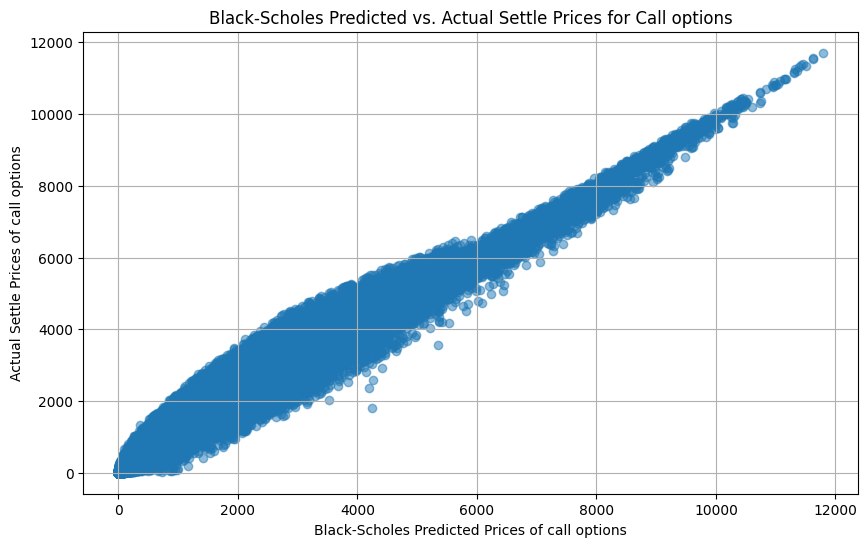

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df[df['Option_type']==1]['BSOptionPrice'], df[df['Option_type']==1]['Settle Price'], alpha=0.5)
plt.title('Black-Scholes Predicted vs. Actual Settle Prices for Call options')
plt.xlabel('Black-Scholes Predicted Prices of call options')
plt.ylabel('Actual Settle Prices of call options')
plt.grid(True)
plt.show()


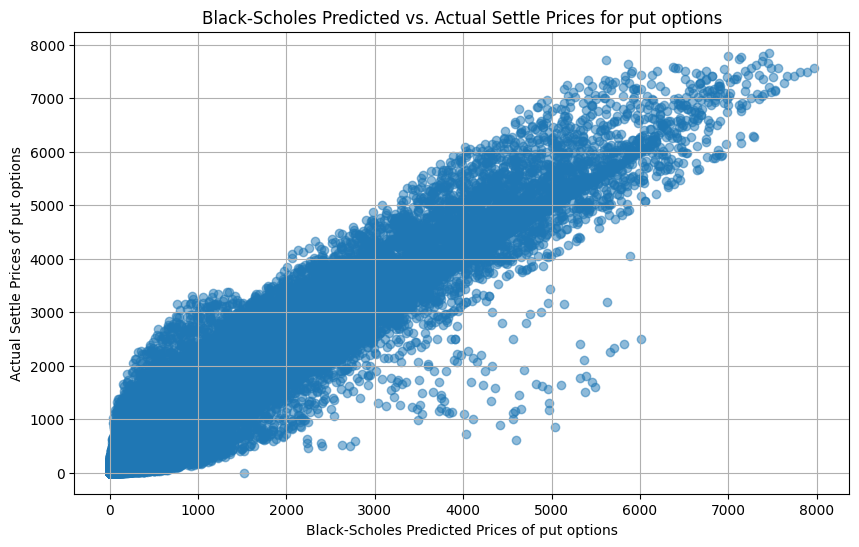

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df[df['Option_type']==0]['BSOptionPrice'], df[df['Option_type']==0]['Settle Price'], alpha=0.5)
plt.title('Black-Scholes Predicted vs. Actual Settle Prices for put options')
plt.xlabel('Black-Scholes Predicted Prices of put options')
plt.ylabel('Actual Settle Prices of put options')
plt.grid(True)
plt.show()


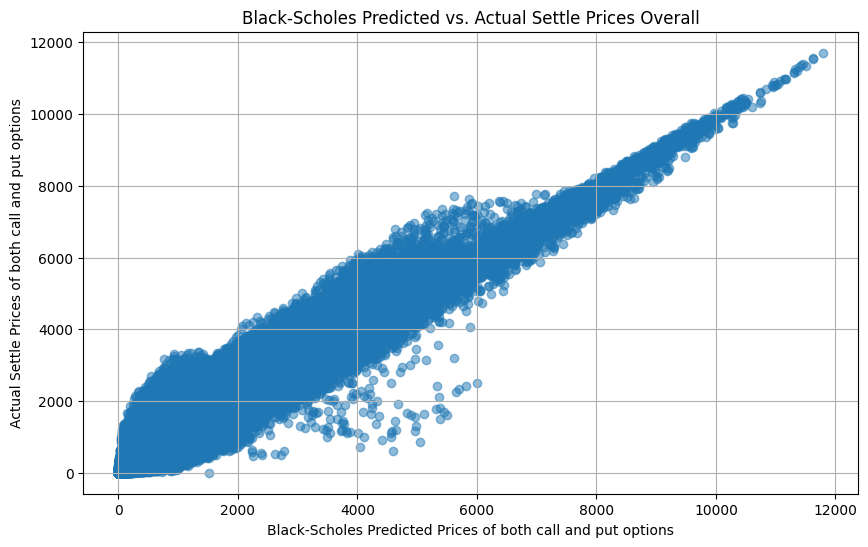

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df[df['Option_type']>=0]['BSOptionPrice'], df[df['Option_type']>=0]['Settle Price'], alpha=0.5)
plt.title('Black-Scholes Predicted vs. Actual Settle Prices Overall')
plt.xlabel('Black-Scholes Predicted Prices of both call and put options')
plt.ylabel('Actual Settle Prices of both call and put options')
plt.grid(True)
plt.show()


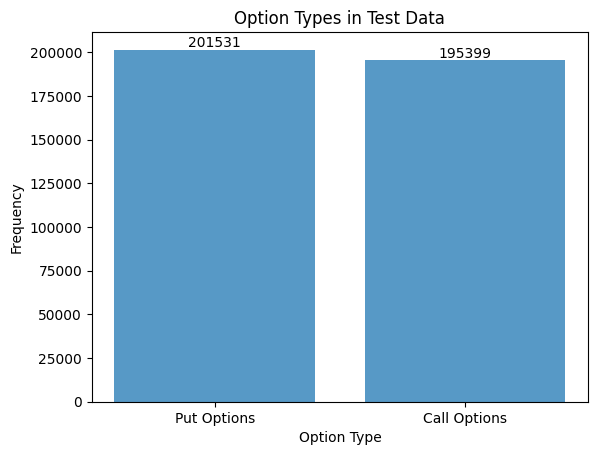

In [77]:
counts, bins, patches = plt.hist(df['Option_type'], bins=[-0.5, 0.5, 1.5], alpha=0.75, rwidth=0.8)

# Adding frequency labels on top of each bar
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count + 0.1, str(int(count)), ha='center', va='bottom')

plt.xticks([1, 0], ['Call Options', 'Put Options'])
plt.xlabel('Option Type')
plt.ylabel('Frequency')
plt.title('Option Types in Test Data')
plt.show()

In [46]:
df

,Date,Expiry,Option_type,Strike Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,time_to_maturity_years,riskfree_rates,Div_yield,Historical Volatility,BSOptionPrice2,Implied_Volatility,Settle Price,BSOptionPrice,MeOptionPrice
1585870,2020-02-24,2020-03-05,0,11450.0,0.0,0.0,11829.40,10,0.027397,5.237840,1.29,0.179577,21.684363,16.9975,12.60,17.994518,18.461506
2144190,2021-12-16,2022-01-13,0,19450.0,0.0,0.0,17248.40,28,0.076712,4.349630,1.19,0.193581,2141.903414,15.8950,2155.85,2137.803743,2153.477206
458738,2020-07-10,2020-08-27,1,8850.0,0.0,0.0,10768.05,48,0.131507,3.596500,1.49,0.193156,1960.220617,24.9425,1980.55,1963.859271,1943.034543
2220750,2022-03-30,2022-04-28,0,15150.0,5050.0,0.0,17498.25,29,0.079452,4.539230,1.17,0.201542,1.350913,20.6100,4.45,1.656640,1.740860
2121441,2021-11-17,2021-12-09,0,17450.0,0.0,0.0,17898.65,22,0.060274,4.218380,1.12,0.140358,71.765609,14.9800,183.45,83.763093,86.433305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425197,2019-09-27,2023-06-29,0,8400.0,0.0,0.0,11512.40,1371,3.756164,6.270620,1.30,0.130712,11.576600,16.1150,443.00,42.325327,60.363731
479013,2020-08-06,2021-12-30,1,8000.0,0.0,0.0,11200.15,511,1.400000,3.978590,1.47,0.276011,3800.427020,23.1500,3857.25,3719.173607,3505.378541
659867,2021-04-29,2022-03-31,1,13000.0,0.0,0.0,14894.90,336,0.920548,3.803800,0.99,0.179168,2539.383811,23.3050,2920.80,2731.462566,2622.800523
1638263,2020-04-01,2020-09-24,0,7500.0,0.0,0.0,8253.80,176,0.482192,4.019050,1.84,0.353463,395.321002,60.0525,1146.80,888.281010,911.446861


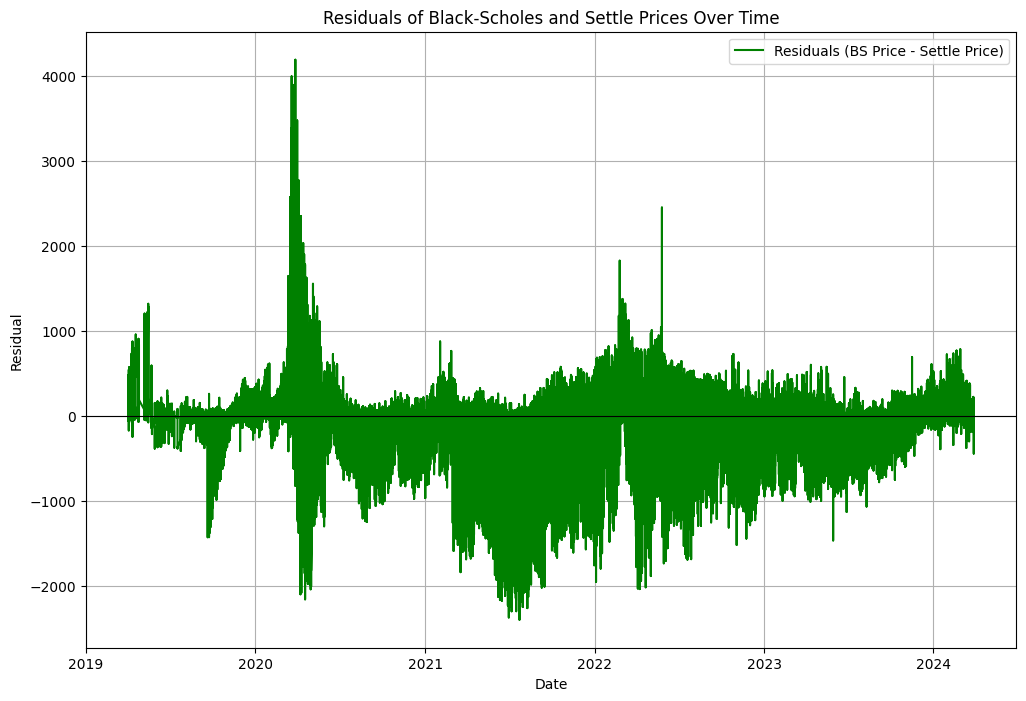

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute residuals
df['Residuals'] = df['BSOptionPrice'] - df['Settle Price']

plt.figure(figsize=(12, 8))
plt.plot(df['Date'], df['Residuals'], label='Residuals (BS Price - Settle Price)', color='green')
plt.title('Residuals of Black-Scholes and Settle Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(0, color='black', linewidth=0.8)  # Adds a line at zero
plt.legend()
plt.grid(True)
plt.show()


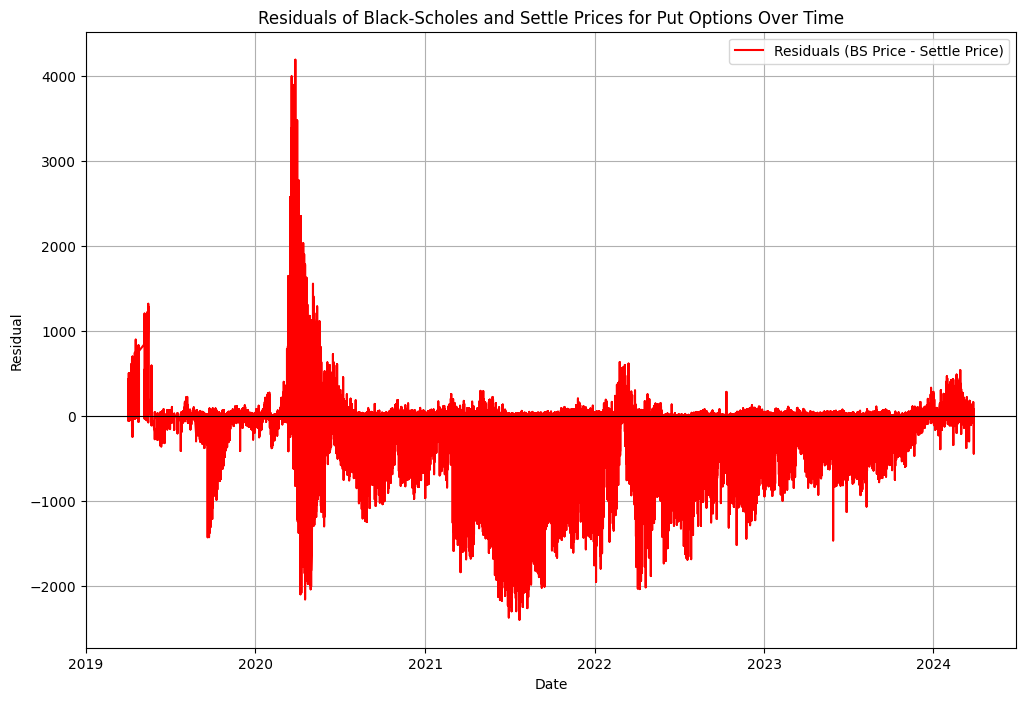

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute residuals
plt.figure(figsize=(12, 8))
plt.plot(df[df['Option_type']==0]['Date'], df[df['Option_type']==0]['Residuals'], label='Residuals (BS Price - Settle Price)', color='red')
plt.title('Residuals of Black-Scholes and Settle Prices for Put Options Over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(0, color='black', linewidth=0.8)  # Adds a line at zero
plt.legend()
plt.grid(True)
plt.show()


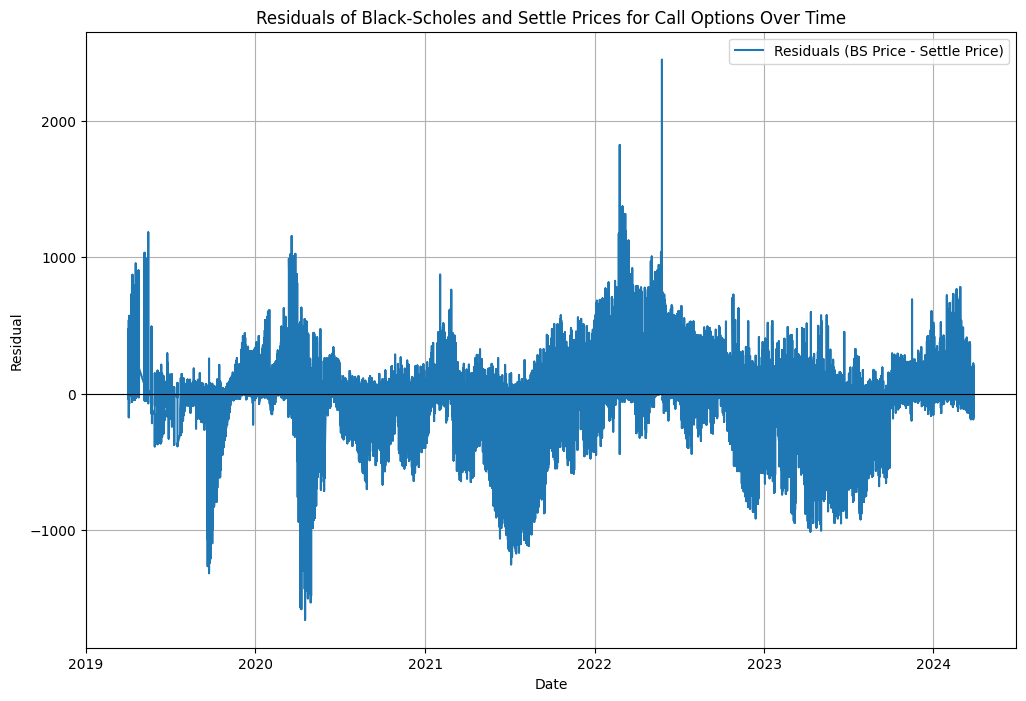

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute residuals
plt.figure(figsize=(12, 8))
plt.plot(df[df['Option_type']==1]['Date'], df[df['Option_type']==1]['Residuals'], label='Residuals (BS Price - Settle Price)')
plt.title('Residuals of Black-Scholes and Settle Prices for Call Options Over Time')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.axhline(0, color='black', linewidth=0.8)  # Adds a line at zero
plt.legend()
plt.grid(True)
plt.show()


In [69]:
df

,Date,Expiry,Option_type,Strike Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,time_to_maturity_years,riskfree_rates,...,BSOptionPrice2,Implied_Volatility,Settle Price,BSOptionPrice,MeOptionPrice,BSOptionPrice_smooth,SettlePrice_smooth,PriceDifference,Difference,Residuals
1303787,2019-04-02,2021-06-24,0,7300.0,0.0,0.0,11713.2,814,2.230137,6.850524,...,0.026467,18.0825,0.25,8.003631,10.340813,NaN,NaN,7.753631,7.753631,7.753631
1588,2019-04-02,2023-06-29,1,9000.0,0.0,0.0,11713.2,1549,4.243836,7.228610,...,5108.206896,18.0825,5082.35,5179.285239,4662.317927,NaN,NaN,96.935239,96.935239,96.935239
1212,2019-04-02,2020-12-31,1,8900.0,0.0,0.0,11713.2,639,1.750685,6.765487,...,3809.849021,18.0825,3865.60,3855.359152,3637.614784,NaN,NaN,-10.240848,10.240848,-10.240848
1303756,2019-04-02,2021-06-24,0,12900.0,0.0,0.0,11713.2,814,2.230137,6.850524,...,474.284530,18.0825,558.85,929.490851,1040.199519,NaN,NaN,370.640851,370.640851,370.640851
947,2019-04-02,2019-12-26,1,6600.0,0.0,0.0,11713.2,268,0.734247,6.642900,...,5427.392071,18.0825,5450.75,5427.400850,5331.473888,NaN,NaN,-23.349150,23.349150,-23.349150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302082,2024-03-28,2024-04-18,1,22400.0,12700.0,6600.0,22326.9,21,0.057534,7.144065,...,264.965310,12.8325,280.75,283.532590,275.634168,710.516726,698.040000,2.782590,2.782590,2.782590
1302216,2024-03-28,2024-05-02,1,20700.0,0.0,0.0,22326.9,35,0.095890,7.144065,...,1770.327489,12.8325,1764.75,1774.096291,1748.899627,729.205354,716.758333,9.346291,9.346291,9.346291
2645797,2024-03-28,2024-04-25,0,19750.0,1500.0,0.0,22326.9,28,0.076712,7.144065,...,0.005630,12.8325,0.05,0.028554,0.031706,729.205780,716.758333,-0.021446,0.021446,-0.021446
1301880,2024-03-28,2024-04-04,1,20800.0,1550.0,1500.0,22326.9,7,0.019178,7.144065,...,1555.378456,12.8325,1648.10,1555.380517,1550.242986,766.446010,758.661667,-92.719483,92.719483,-92.719483


In [71]:
X

,Date,Expiry,Option_type,Strike Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,time_to_maturity_years,riskfree_rates,Div_yield,Historical Volatility,BSOptionPrice2,Implied_Volatility,Settle Price
0,2019-04-02,2019-04-04,1,10000.0,375.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1716.839283,18.0825,1717.00
1,2019-04-02,2019-04-04,1,10050.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1666.857479,18.0825,1667.05
2,2019-04-02,2019-04-04,1,10100.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1616.875676,18.0825,1617.05
3,2019-04-02,2019-04-04,1,10150.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1566.893872,18.0825,1567.10
4,2019-04-02,2019-04-04,1,10200.0,0.0,0.0,11713.2,2,0.005479,6.642900,1.12,0.000010,1516.912068,18.0825,1517.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646191,2024-03-28,2028-12-28,0,23000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1090.588233,12.8325,355.80
2646192,2024-03-28,2028-12-28,0,24000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1320.485547,12.8325,493.50
2646193,2024-03-28,2028-12-28,0,25000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1576.276690,12.8325,664.00
2646194,2024-03-28,2028-12-28,0,26000.0,0.0,0.0,22326.9,1736,4.756164,7.047014,1.20,0.193105,1857.824399,12.8325,869.65


In [70]:
print(X.isnull().sum())

Date                      0
Expiry                    0
Option_type               0
Strike Price              0
Open Int                  0
Change in OI              0
Underlying Value          0
time_to_maturity_days     0
time_to_maturity_years    0
riskfree_rates            0
Div_yield                 0
Historical Volatility     0
BSOptionPrice2            0
Implied_Volatility        0
Settle Price              0
dtype: int64


In [73]:
X.columns

Index(['Date', 'Expiry', 'Option_type', 'Strike Price', 'Open Int',
       'Change in OI', 'Underlying Value', 'time_to_maturity_days',
       'time_to_maturity_years', 'riskfree_rates', 'Div_yield',
       'Historical Volatility', 'BSOptionPrice2', 'Implied_Volatility',
       'Settle Price'],
      dtype='object')

In [75]:
X[['Strike Price', 'Open Int','Change in OI', 'Underlying Value', 'time_to_maturity_days', 'riskfree_rates', 'Div_yield','Historical Volatility', 'Implied_Volatility','Settle Price']].describe()

,Strike Price,Open Int,Change in OI,Underlying Value,time_to_maturity_days,riskfree_rates,Div_yield,Historical Volatility,Implied_Volatility,Settle Price
count,2.646196e+06,2.646196e+06,2.646196e+06,2.646196e+06,2.646196e+06,2.646196e+06,2.646196e+06,2.646196e+06,2.646196e+06,2.646196e+06
mean,1.427481e+04,8.579579e+04,1.235613e+04,1.467294e+04,2.652344e+02,5.343650e+00,1.307733e+00,1.645139e-01,2.035787e+01,1.139616e+03
std,4.035007e+03,4.573058e+05,1.634155e+05,3.566297e+03,4.519343e+02,1.264069e+00,1.734360e-01,1.138512e-01,1.042809e+01,1.454735e+03
min,4.600000e+03,0.000000e+00,-9.214650e+06,7.610250e+03,1.000000e+00,3.461000e+00,9.500000e-01,1.000000e-05,1.013500e+01,0.000000e+00
25%,1.120000e+04,0.000000e+00,0.000000e+00,1.158820e+04,2.200000e+01,4.019050e+00,1.200000e+00,1.093354e-01,1.449000e+01,8.020000e+01
50%,1.415000e+04,0.000000e+00,0.000000e+00,1.495620e+04,4.800000e+01,5.441760e+00,1.290000e+00,1.437343e-01,1.748750e+01,6.037500e+02
75%,1.740000e+04,3.450000e+03,0.000000e+00,1.762225e+04,2.480000e+02,6.642900e+00,1.400000e+00,1.924576e-01,2.203250e+01,1.604700e+03
max,2.700000e+04,1.823400e+07,1.609445e+07,2.249355e+04,1.826000e+03,7.425009e+00,2.000000e+00,1.401401e+00,8.360750e+01,1.222010e+04


In [81]:
X_train.columns

Index(['Date', 'Expiry', 'Option_type', 'Strike Price', 'Open Int',
       'Change in OI', 'Underlying Value', 'time_to_maturity_days',
       'time_to_maturity_years', 'riskfree_rates', 'Div_yield',
       'Historical Volatility', 'BSOptionPrice2', 'Implied_Volatility',
       'Settle Price'],
      dtype='object')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

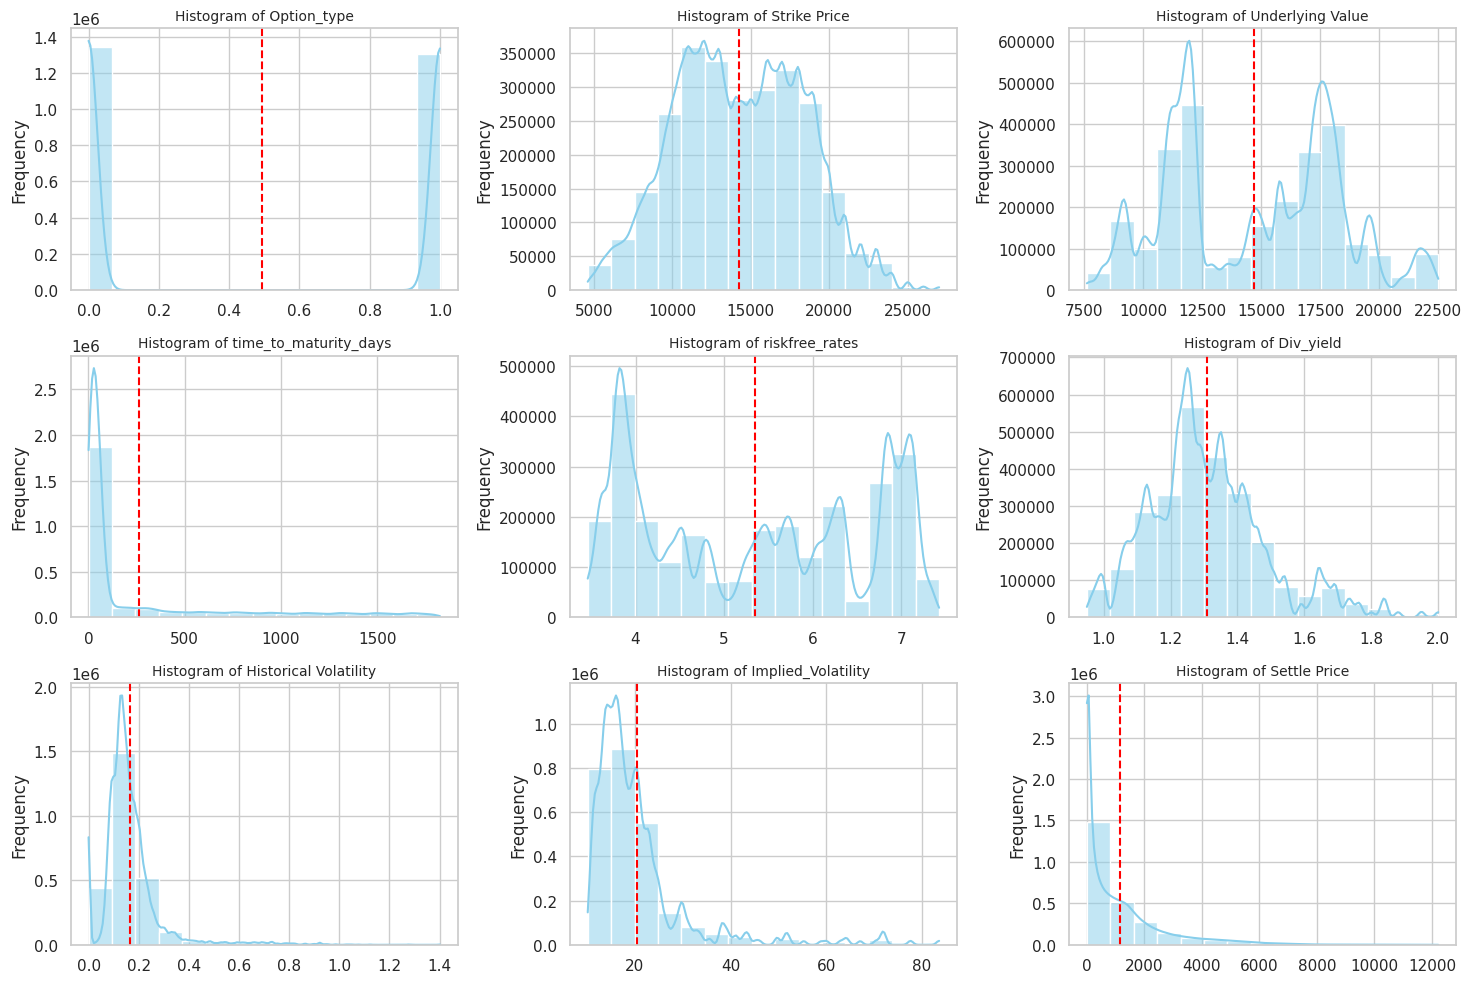

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Data preparation: Assume X is your DataFrame
features = X_train[['Option_type', 'Strike Price', 'Underlying Value', 'time_to_maturity_days',
        'riskfree_rates', 'Div_yield','Historical Volatility', 'Implied_Volatility',
       'Settle Price']]  # Consider the first 9 features for plotting
n_bins = 15  # Number of bins for the histogram

# Creating a figure for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # Adjust layout to fit all histograms

# Flatten axes array for easy iteration
axes = axes.ravel()

for i, col in enumerate(features):
    # Plot histogram
    sns.histplot(X[col], bins=n_bins, ax=axes[i], kde=True, color='skyblue')
    
    # Add a mean line
    mean_val = X[col].mean()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=1.5)
    
    # Set titles and labels
    axes[i].set_title(f'Histogram of {col}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
X

In [ ]:
# Plot box plots for all continuous features
continuous_cols = ['Strike Price', 'Open Int', 'Change in OI', 'Underlying Value', 'riskfree_rates', 'Div_yield', 'Historical Volatility']
for col in continuous_cols:
    sns.boxplot(x=X[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


In [ ]:
# Plot pair plot of selected features
sns.pairplot(X[continuous_cols])
plt.show()


In [6]:
df = pd.read_csv("/kaggle/input/implied-volatility/option_implied_v.csv")

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.day_of_week


In [8]:
X = df[['Option_type', 'Strike Price', 'Open Int', 'Change in OI', 'Underlying Value', 'time_to_maturity_days', 'riskfree_rates', 'Div_yield','Historical Volatility','Implied_Volatility','year', 'month', 'day', 'day_of_week', 'Settle Price']]
y = df['Settle Price']

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

In [10]:
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.1765, random_state=42)

In [11]:
X_train.columns

Index(['Option_type', 'Strike Price', 'Open Int', 'Change in OI',
       'Underlying Value', 'time_to_maturity_days', 'riskfree_rates',
       'Div_yield', 'Historical Volatility', 'Implied_Volatility', 'year',
       'month', 'day', 'day_of_week', 'Settle Price'],
      dtype='object')

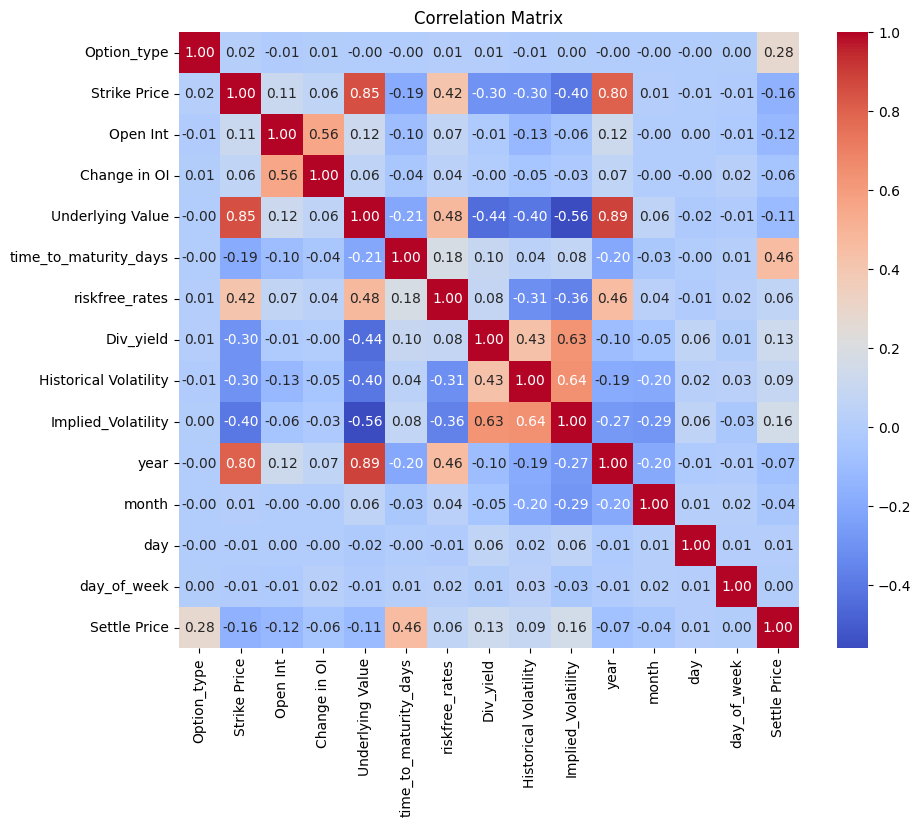

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate correlation matrix
corr_matrix = X_train.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Calculate the interaction terms between features
interaction_data = X[['Strike Price', 'Open Int', 'riskfree_rates', 'Div_yield']].copy()
for col in interaction_data.columns:
    for col2 in interaction_data.columns:
        if col != col2:
            interaction_data[f'{col}_x_{col2}'] = interaction_data[col] * interaction_data[col2]

# Correlation matrix for interaction terms
interaction_corr = interaction_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(interaction_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Interaction Features')
plt.show()

In [ ]:
# Violin plots for categorical data
for col in categorical_cols:
    sns.violinplot(x=col, y='Underlying_Value', data=data)
    plt.title(f'Violin Plot of Underlying Value by {col}')
    plt.show()


In [ ]:
df

In [ ]:
# Plot scatter plots with regression lines
for col in ['Strike Price', 'Open Int', 'riskfree_rates', 'Historical Volatility', 'Underlying Value']:
    sns.lmplot(x=col, y='Settle Price', data=df, aspect=1.5, ci=None)
    plt.title(f'Scatter Plot of {col} vs Underlying Value')
plt.show()
